#SIS2406 - Estructura de Datos y Algoritmos
## Primavera 2024

<div>
<img src="https://drive.google.com/uc?export=view&id=1_ZAbL21argoGVFRpHidRYf5vOKgdusal" width="250"/>
</div>

### SIS2406_Python_4.1

**Enrique Naredo García**

<font size = 2>
©️ Todos los derechos reservados. All rights reserved.

*Nota: El presente documento es una herramienta diseñada única y exclusivamente para los estudiantes de la asignatura arriba mencionada. Se recuerda no compartir esta información fuera de los integrantes registrados en este curso. La reproducción total o parcial de este documento requiere autorización por escrito del titular del copyright.*
</font>

# Árbol Binario

Un árbol binario es un árbol donde cada nodo no puede tener más de dos subárboles.

* Cada nodo puede tener uno, dos, o cero hijos o subárboles.
* El nodo de la izquierda se dice hijo izquierdo.
* El nodo de la derecha se dice hijo derecho.

Los árboles se pueden representar de dos maneras:
* Representación de matriz (representación secuencial).
* Representación dinámica de nodos (representación vinculada).


## Representación dinámica de nodos

In [94]:
# Nodo individual
class Nodo:
	def __init__(self, dato):
		self.val = dato
		self.izq = None
		self.der = None

In [3]:
# Crea un nodo
raiz = Nodo(1)
print(raiz.val)
print(raiz.izq)
print(raiz.der)

1
None
None


In [4]:
# agrega un nodo izquierdo
raiz.izq = Nodo(2)
print(raiz.izq.val)
print(raiz.izq.izq)
print(raiz.izq.der)

2
None
None


In [5]:
# agrega un nodo derecho
raiz.der = Nodo(3)
print(raiz.der.val)
print(raiz.der.izq)
print(raiz.der.der)

3
None
None


In [6]:
# muestra el nodo raiz
print(raiz.val)
print(raiz.izq)
print(raiz.der)

1


In [7]:
# agrega un hijo al hijo del raiz
raiz.izq.izq = Nodo(4)
# muestra sus hijos izquierdos
print(raiz.val)
print(raiz.izq.val)
print(raiz.izq.izq.val)

1
2
4


## Visualizar el árbol

In [8]:
# importa librería
from graphviz import Digraph

In [9]:
## método para agregar aristas de un árbol
def agrega_arista(arbol, estructura=None):
  # crea un digrafo
  if estructura is None:
    estructura = Digraph()
    # características del nodo raiz
    estructura.node(name=str(arbol),
      label=str(arbol.val), color = "red",
      shape="circle", width="0.7")

  # agrega nodo izquierdo
  if arbol.izq:
    # características del nodo izquierdo
    estructura.node(name=str(arbol.izq),
      label=str(arbol.izq.val), color="green",
      shape="diamond", width="0.6")
    # características de la arista
    estructura.edge(str(arbol), str(arbol.izq),
      color="lightgreen", width="0.6")
    estructura = agrega_arista(arbol.izq, estructura=estructura)

  # agrega nodo derecho
  if arbol.der:
    # características del nodo derecho
    estructura.node(name=str(arbol.der),
      label=str(arbol.der.val), color="blue",
      shape="triangle", width="0.5")
    # características de la arista
    estructura.edge(str(arbol), str(arbol.der),
      color="lightblue", width="0.6")
    estructura = agrega_arista(arbol.der, estructura=estructura)

  # regresa la estructura
  return estructura

In [10]:
# árbol
A_gen = Nodo('Yo')
A_gen.izq = Nodo('papá')
A_gen.der = Nodo('mamá')
A_gen.izq.izq = Nodo('abuelo')

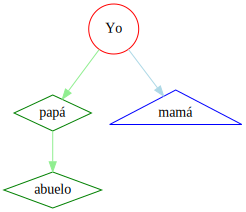

In [11]:
# utiliza el método para agregar aristas
arbolito = agrega_arista(A_gen)
# método propio de la librería Digraph
display(arbolito)

## Árbol Binario de Búsqueda

In [124]:
# Implementación de Árbol Binario de Búsqueda
# Binary Search Tree (BST)
class BST:
  # inicializa la clase
  def __init__(self):
    self.raiz = None

  # Método para insertar un nodo
  def inserta(self, val):
    if not self.raiz:
      self.raiz = Nodo(val)
    else:
      self._recurInserta(val, self.raiz)

  # Método recursivo para insertar un nodo
  def _recurInserta(self, val, nodo):
    if val < nodo.val:
      if nodo.izq:
        self._recurInserta(val, nodo.izq)
      else:
        nodo.izq = Nodo(val)
    else:
      if nodo.der:
        self._recurInserta(val, nodo.der)
      else:
        nodo.der = Nodo(val)

  # Obtiene el valor mínimo
  def get_min(self, nodo):
    nodo_actual = nodo
    while nodo_actual.izq:
      nodo_actual = nodo_actual.izq
    return str(nodo_actual.val)

  # Elimina un nodo del árbol
  def elimina(self, raiz, elem):
    # Caso base
    if raiz is None:
      return raiz
    # llamada recursiva a los ancestros
    # del nodo por eliminar
    if raiz.val > elem:
      raiz.izq = self.elimina(raiz.izq, elem)
      return raiz
    elif raiz.val < elem:
      raiz.der = self.elimina(raiz.der, elem)
      return raiz
    # aquí se encuentra el nodo por eliminar
    if raiz.izq is None:
      temp = raiz.der
      del raiz
      return temp
    elif raiz.der is None:
      temp = raiz.izq
      del raiz
      return temp
    # en caso de que ambos hijos existan
    else:
      padreSig = raiz
      # encuentra al sucesor
      hijoSig = raiz.der
      while hijoSig.izq is not None:
        padreSig = hijoSig
        hijoSig = hijoSig.izq
      # elimina al sucesor
      if padreSig != raiz:
        padreSig.izq = hijoSig.der
      else:
        padreSig.der = hijoSig.der
      # copia el sucesor al nodo raíz
      raiz.val = hijoSig.val
      # elimina el sucesor y devuelve la raíz
      del hijoSig
      return raiz

  # Busca un valor en el árbol
  def busca(self, val):
    return self._recurBusca(self.raiz, val)

  # Busca recursivamente un valor en el árbol
  def _recurBusca(self, nodo, val):
    # Caso 1: nodo raiz
    if nodo is None or nodo.val == val:
      return nodo
    # Caso 2: nodo izquierdo
    if val < nodo.val:
      return self._recurBusca(nodo.izq, val)
    # Caso 3: nodo derecho
    else:
      return self._recurBusca(nodo.der, val)

  # Recorrido enorden (entreorden)
  def enorden(self, raiz):
    lista = []
    if raiz:
      lista = self.enorden(raiz.izq)
      lista.append(raiz.val)
      lista = lista + self.enorden(raiz.der)
    return lista

  # Recorrido preorden
  def preorden(self, raiz):
    lista = []
    if raiz:
      lista.append(raiz.val)
      lista = lista + self.preorden(raiz.izq)
      lista = lista + self.preorden(raiz.der)
    return lista

  # Recorrido postorden
  def postorden(self, raiz):
    lista = []
    if raiz:
      lista = self.postorden(raiz.izq)
      lista = lista + self.postorden(raiz.der)
      lista.append(raiz.val)
    return lista


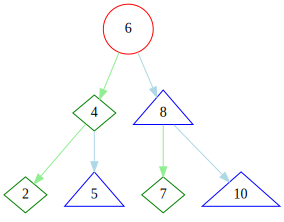

In [125]:
# Ejemplo de uso
T = BST()
T.inserta(6)
T.inserta(4)
T.inserta(8)
T.inserta(2)
T.inserta(5)
T.inserta(7)
T.inserta(10)
T2 = agrega_arista(T.raiz)
display(T2)

In [126]:
# Obtiene el mínimo valor
T.get_min(T.raiz)

'2'

In [127]:
# Ejemplo de uso
T3 = T.busca(7)
T3.val

7

In [130]:
# Ejemplo de uso
T.enorden(T.raiz)

[2, 4, 5, 6, 7, 8, 10]

In [131]:
# Ejemplo de uso
T.preorden(T.raiz)

[6, 4, 2, 5, 8, 7, 10]

In [132]:
# Ejemplo de uso
T.postorden(T.raiz)

[2, 5, 4, 7, 10, 8, 6]

In [133]:
# Ejemplo de uso
T.elimina(T.raiz,2);


In [134]:
# Ejemplo de uso
T.enorden(T.raiz)

[4, 5, 6, 7, 8, 10]

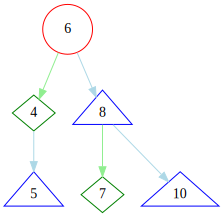

In [136]:
# Ejemplo de uso
T4 = agrega_arista(T.raiz)
display(T4)

In [137]:
# Ejemplo de uso
T.elimina(T.raiz,8);

In [138]:
# Ejemplo de uso
T.enorden(T.raiz)

[4, 5, 6, 7, 10]

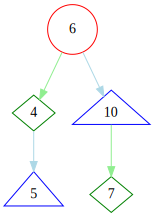

In [139]:
# Ejemplo de uso
T5 = agrega_arista(T.raiz)
display(T5)